# **Project 2 - Seoul Bike Trip Duration Prediction**

**Description** - Trip duration is the most fundamental measure in all modes of transportation.
Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent
Transport Systems (ITS) and traveller information systems. In order to predict the trip
duration, data mining techniques are employed in this paper to predict the trip duration of
rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination
of Seoul Bike data and weather data. The Data used include trip duration, trip distance,
pickup-drop-off latitude and longitude, temperature, precipitation, wind speed, humidity, solar
radiation, snowfall, ground temperature and 1-hour average dust concentration.

Four performance metrics Root mean squared error, Coefficient of Variance, Mean Absolute
Error and Median Absolute Error can be used to determine the efficiency of the models

**Tasks** – EDA, Pre-processing, Modelling, Feature Engineering, Evaluation, explainability, Deployment

# **Data Exploration and Preprocessing**

In [1]:
import pandas as pd

In [2]:
filepath = '/content/drive/MyDrive/My Projects/The Machine Learning Company/Project 2 - Seoul Bike Trip/For_modeling.csv'

In [3]:
dataset = pd.read_csv(filepath)

In [4]:
dataset.shape

(9601139, 26)

In [5]:
dataset.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [6]:
dataset.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [7]:
dataset.tail()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,43,0,1,1,0,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,54,0,1,1,0,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,59,0,1,1,0,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,55,0,1,1,1,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601138,9830310,116,1410,37.585655,127.075050,37.585655,127.075050,0.000000,12,31,23,33,0,1,1,1,30,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [8]:
dataset.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [10]:
dataset.isnull().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

Removing Duplicate rows?

In [11]:
dataset[dataset.duplicated()]

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust


In [12]:
dataset.shape

(9601139, 26)

**Univariate Analysis**

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

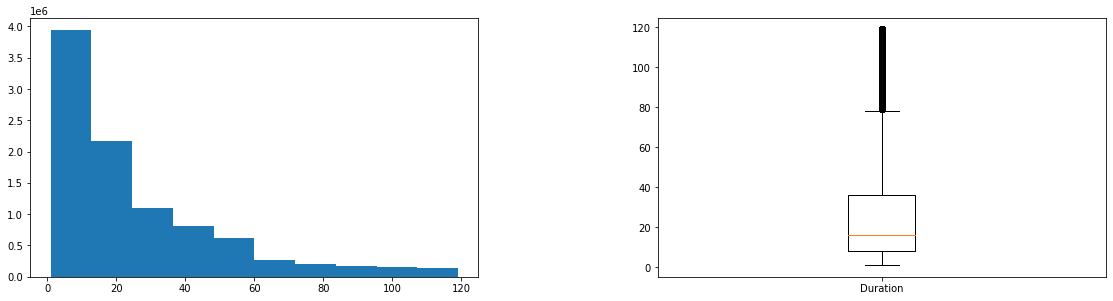

In [15]:
plt.subplot(1,2,1)
plt.hist(dataset['Duration'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Duration'], labels=['Duration'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Log of distribution**

In [16]:
dataset['Duration'] = np.log2(dataset['Duration'])

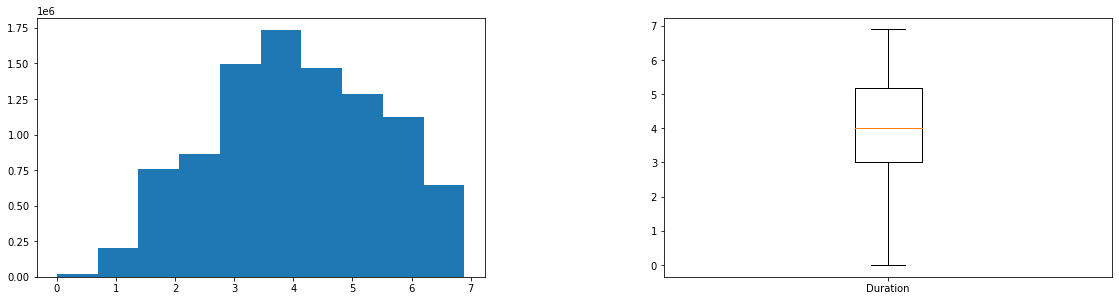

In [17]:
plt.subplot(1,2,1)
plt.hist(dataset['Duration'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Duration'], labels=['Duration'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [18]:
dataset['Duration'].skew()

-0.05818830225826713

In [19]:
np.log2(dataset['Duration']).skew() 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

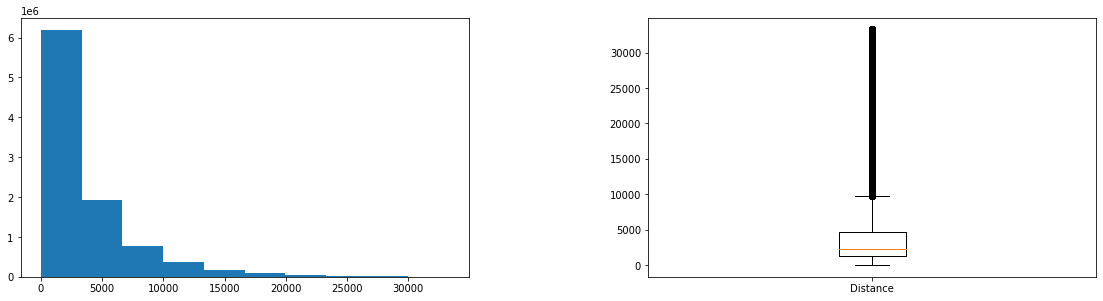

In [20]:
plt.subplot(1,2,1)
plt.hist(dataset['Distance'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Distance'], labels=['Distance'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [21]:
dataset['Distance'] = np.log2(dataset['Distance'])

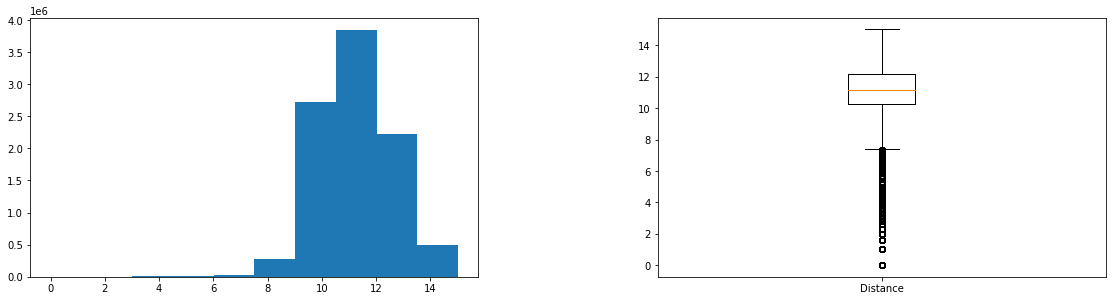

In [22]:
plt.subplot(1,2,1)
plt.hist(dataset['Distance'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Distance'], labels=['Distance'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [23]:
sorted(dataset)
Q1 = dataset['Distance'].quantile(0.25)
Q3 = dataset['Distance'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

1.9092345360768181


In [24]:
dataset[dataset['Distance'] < (Q1 - 1.5 * IQR)].head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,1.584963,5.643856,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.00,0.0,-2.2,25.0
139,140,1.000000,3.321928,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,37,0,1,1,0,40,0,-3.2,0.0,0.5,40.0,0.00,0.0,-2.2,25.0
524,528,1.000000,5.643856,37.481800,126.915237,37.481800,126.915237,0.0,1,1,1,57,0,1,1,2,0,0,-3.3,0.0,0.7,41.0,0.00,0.0,-2.7,39.0
614,618,4.169925,3.321928,37.534718,126.900002,37.534718,126.900002,0.0,1,1,2,18,0,1,1,2,38,0,-3.7,0.0,0.9,42.0,0.00,0.0,-3.0,30.0
1905,1936,1.000000,7.228819,37.504566,126.910233,37.504566,126.910233,0.0,1,1,12,47,0,1,1,12,50,0,1.5,0.0,2.8,20.0,1.03,0.0,0.3,60.0


In [25]:
dataset.drop(dataset[dataset['Distance'] < (Q3 - 1.5 * IQR)].index, inplace=True)
dataset.drop(dataset[dataset['Distance'] > (Q3 + 1.5 * IQR)].index, inplace=True)

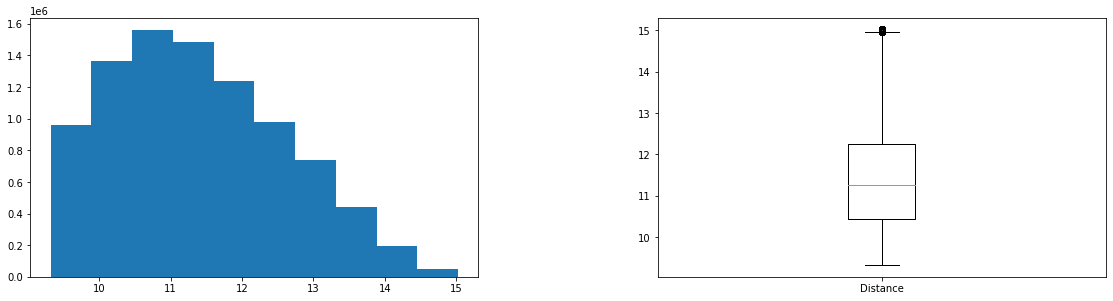

In [26]:
plt.subplot(1,2,1)
plt.hist(dataset['Distance'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Distance'], labels=['Distance'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [27]:
dataset['Distance'].skew() 

0.40898029333987523

In [28]:
np.log2(dataset['Distance']).skew() 

0.21616471590923636

Plong

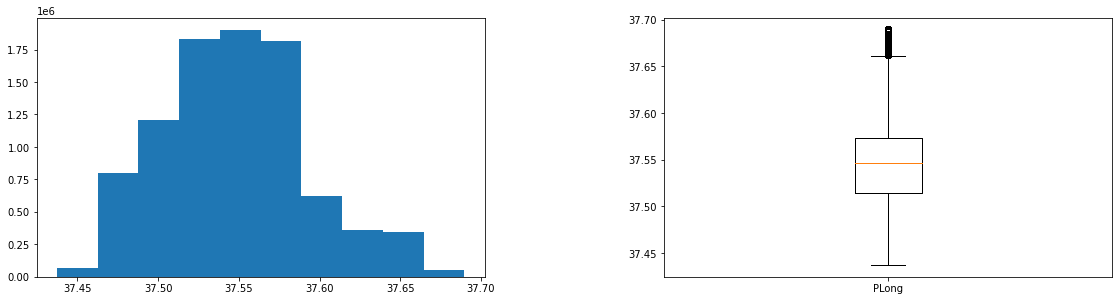

In [29]:
plt.subplot(1,2,1)
plt.hist(dataset['PLong'])
plt.subplot(1,2,2)
plt.boxplot(dataset['PLong'], labels=['PLong'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [30]:
sorted(dataset)
Q1=dataset['PLong'].quantile(0.25)
Q3=dataset['PLong'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

0.059153999999999485


In [31]:
dataset[dataset['PLong'] > (Q3 + 1.5 * IQR)].head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
461,464,4.700440,12.866893,37.680313,127.055069,37.638649,127.066292,4.736999,1,1,1,42,0,1,1,2,10,0,-3.3,0.0,0.7,41.0,0.00,0.0,-2.7,39.0
523,527,4.459432,11.727070,37.676941,127.055099,37.654701,127.063400,2.578660,1,1,1,57,0,1,1,2,21,0,-3.3,0.0,0.7,41.0,0.00,0.0,-2.7,39.0
678,682,6.357552,14.408728,37.689720,127.045197,37.529770,127.074860,17.976564,1,1,2,37,0,1,1,4,0,0,-3.7,0.0,0.9,42.0,0.00,0.0,-3.0,30.0
1238,1257,6.108524,11.884171,37.669079,127.077591,37.654701,127.063400,2.028907,1,1,8,37,0,1,1,9,50,0,-5.0,0.0,1.0,55.0,0.00,0.0,-4.9,29.0
1288,1307,5.807355,13.816784,37.669079,127.077591,37.669079,127.077591,0.000000,1,1,9,4,0,1,1,10,1,0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0


In [32]:
dataset.drop(dataset[dataset['PLong'] > (Q3 + 1.5 * IQR)].index, inplace=True)

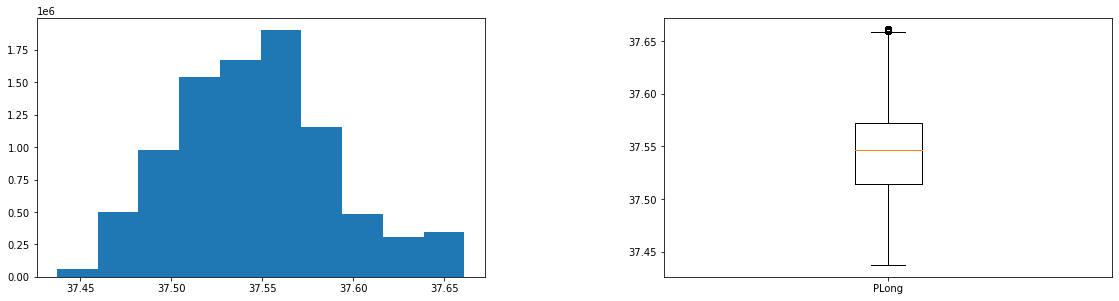

In [33]:
plt.subplot(1,2,1)
plt.hist(dataset['PLong'])
plt.subplot(1,2,2)
plt.boxplot(dataset['PLong'], labels=['PLong'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**PLatd**

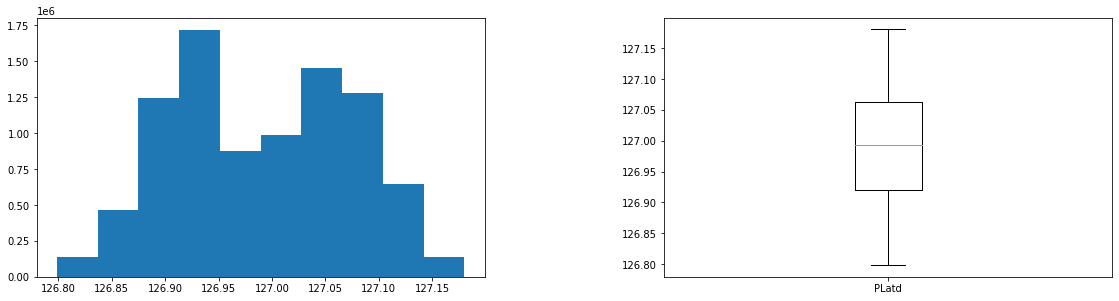

In [34]:
plt.subplot(1,2,1)
plt.hist(dataset['PLatd'])
plt.subplot(1,2,2)
plt.boxplot(dataset['PLatd'], labels=['PLatd'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**DLong**

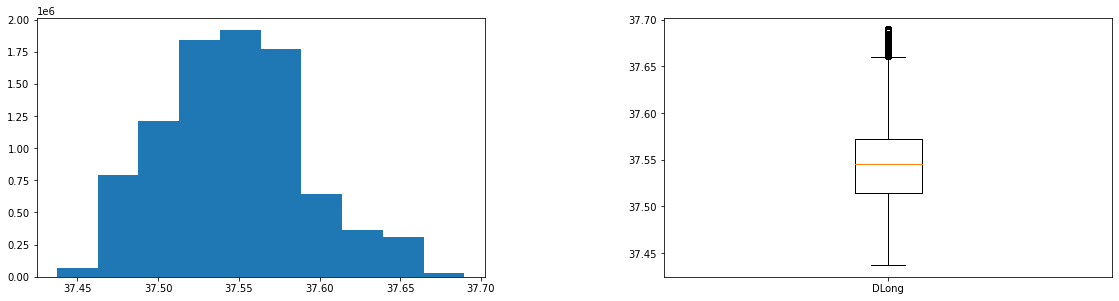

In [35]:
plt.subplot(1,2,1)
plt.hist(dataset['DLong'])
plt.subplot(1,2,2)
plt.boxplot(dataset['DLong'], labels=['DLong'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [36]:
sorted(dataset)
Q1=dataset['DLong'].quantile(0.25)
Q3=dataset['DLong'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

0.05862000000000478


In [37]:
dataset[dataset['DLong'] > (Q3 + 1.5 * IQR)].head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1018,1030,4.000000,11.466586,37.650127,127.035347,37.673283,127.043991,2.684907,1,1,5,47,0,1,1,6,4,0,-4.4,0.0,0.8,54.0,0.00,0.0,-4.2,29.0
1141,1158,4.857981,11.833681,37.654701,127.063400,37.680313,127.055069,2.940816,1,1,7,27,0,1,1,7,56,0,-4.7,0.0,1.1,56.0,0.00,0.0,-4.7,30.0
1413,1433,5.000000,13.065079,37.660000,127.072968,37.680313,127.055069,2.753835,1,1,10,9,0,1,1,10,43,0,-1.6,0.0,0.8,32.0,0.53,0.0,-0.8,33.0
2656,2711,4.584963,12.243769,37.643551,127.022346,37.673283,127.043991,3.815825,1,1,15,10,0,1,1,15,35,0,3.0,0.0,2.9,27.0,0.78,0.0,1.4,50.0
4909,5029,4.754888,12.360847,37.654701,127.063400,37.689720,127.045197,4.210642,1,2,1,25,1,1,2,1,53,1,-2.1,0.0,0.8,56.0,0.00,0.0,-3.0,42.0


In [38]:
dataset.drop(dataset[dataset['DLong'] > (Q3 + 1.5 * IQR)].index, inplace=True)

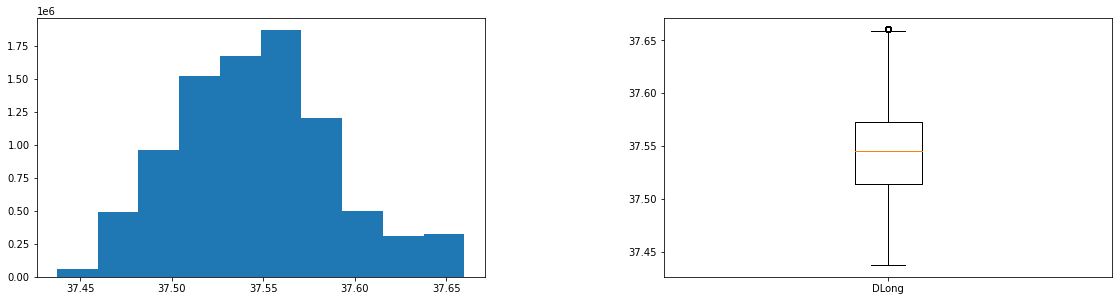

In [39]:
plt.subplot(1,2,1)
plt.hist(dataset['DLong'])
plt.subplot(1,2,2)
plt.boxplot(dataset['DLong'], labels=['DLong'])

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [40]:
dataset.shape

(8904463, 26)

In [41]:
dataset.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1,1,4.584963,12.905011,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,3.000000,10.440869,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,3.000000,10.829723,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,2.000000,9.731319,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
5,5,3.000000,10.813781,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [42]:
import seaborn as sns

In [43]:
correlation = dataset.corr()

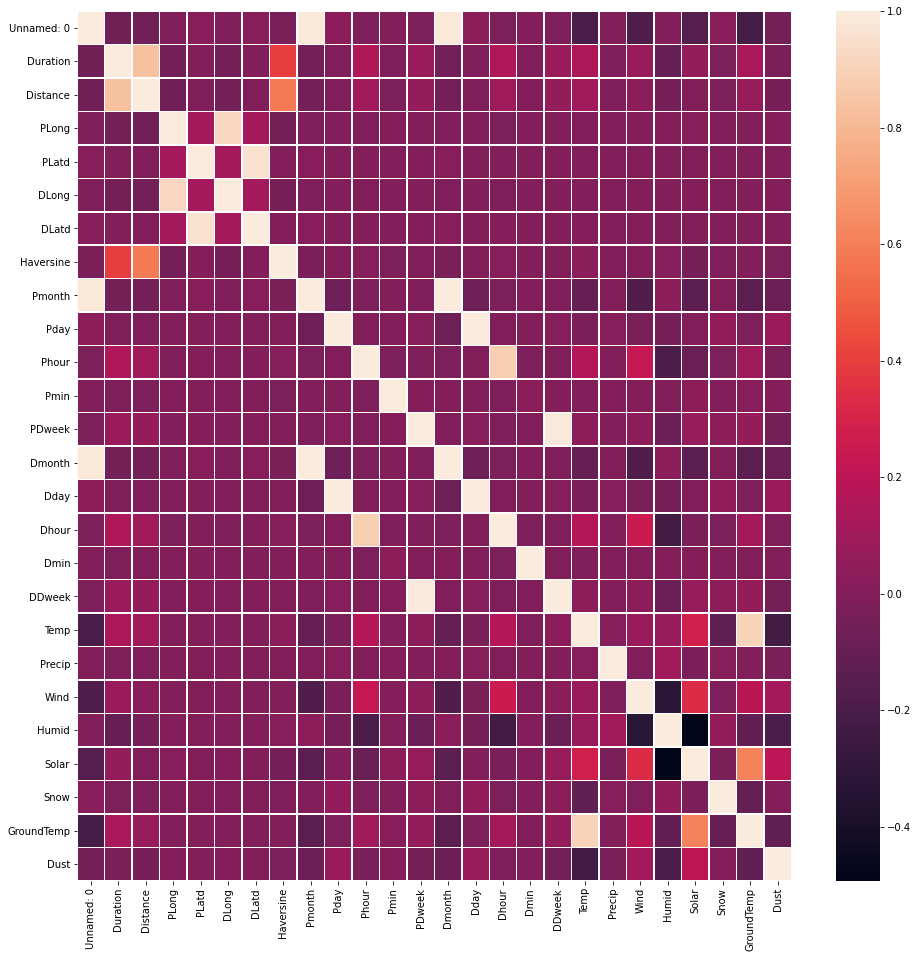

In [44]:
plt.figure(figsize = (16,16))
sns.heatmap(correlation, linewidths=.5)
plt.show()

# **Preparing the Data**

In [45]:
X = dataset.drop(columns=['Duration'])
Y = dataset['Duration']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=10) 

In [48]:
print("X_Train Shape: ", X_train.shape)
print("Y_Train Shape: ", Y_train.shape)
print("\nX_Test Shape: ", X_test.shape)
print("Y_Test Shape: ", Y_test.shape)

X_Train Shape:  (6233124, 25)
Y_Train Shape:  (6233124,)

X_Test Shape:  (2671339, 25)
Y_Test Shape:  (2671339,)


# **Model Building and Evaluation**

## **1. Linear Regression**

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
LRPrediction = LR.predict(X_test)

In [53]:
print("Slope: ", LR.coef_)
print("Intercept: ", LR.intercept_)

Slope:  [ 1.51010587e-10  9.84814604e-01 -2.18438655e-01  7.95292526e-02
  1.89767402e-01  4.78127320e-02 -8.54667331e-02 -1.07654431e-01
 -1.55988751e-03  1.86393090e-03 -6.51568041e-05 -2.33183118e-03
  1.06780782e-01  1.08926177e-03  9.71433676e-03 -3.76489392e-04
  1.67611269e-02  7.99194258e-03  9.58913797e-03  1.11880028e-02
 -2.12161356e-03  6.97520982e-02  3.38817796e-02 -2.84863517e-03
  1.15294304e-04]
Intercept:  -22.204164193899874


In [54]:
from sklearn import metrics

In [55]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, LRPrediction), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, LRPrediction), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, LRPrediction)), 3) )

MAE: 0.489
MSE: 0.492
RMSE:  0.699


## **2. Decision Tree Regression**

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
DTRPrediction = DTR.predict(X_test)

In [59]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, DTRPrediction), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, DTRPrediction), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, DTRPrediction)), 3) )

MAE: 0.295
MSE: 0.278
RMSE:  0.543


## **3. Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [62]:
RidgePredication = ridgeReg.predict(X_test)

In [63]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, RidgePredication), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, RidgePredication), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, RidgePredication)), 3) )

MAE: 0.496
MSE: 0.498
RMSE:  0.704


## **4. Lasso Regression**

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lassoReg = Lasso(alpha=1, normalize=True)
lassoReg.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [66]:
LassoPrediction = lassoReg.predict(X_test)

In [67]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, LassoPrediction), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, LassoPrediction), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, LassoPrediction)), 3) )

MAE: 1.115
MSE: 1.759
RMSE:  1.056


## **5. Elastic Net Regression Model**

In [68]:
from sklearn.linear_model import ElasticNet

In [69]:
ENreg = ElasticNet(alpha=0.001, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,Y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
ElasticNetPrediction = ENreg.predict(X_test)

In [71]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, ElasticNetPrediction), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, ElasticNetPrediction), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, ElasticNetPrediction)), 3) )

MAE: 0.489
MSE: 0.493
RMSE:  0.699


# **Saving the Best Model**

In [72]:
import pickle

In [73]:
import joblib

In [74]:
filename = 'Seoul_model.sav'

In [75]:
pickle.dump(DTR, open(filename, 'wb'))

In [76]:
loaded_model = pickle.load(open(filename, 'rb'))

In [77]:
loadedprediction = loaded_model.predict(X_test)

In [78]:
#MAE
print("MAE:", round(metrics.mean_absolute_error(Y_test, loadedprediction), 3) )

#MSE
print("MSE:", round(metrics.mean_squared_error(Y_test, loadedprediction), 3) )

#RMSE
print("RMSE: ", round(np.sqrt(metrics.mean_absolute_error(Y_test, loadedprediction)), 3) )

MAE: 0.295
MSE: 0.278
RMSE:  0.543
